In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import fashion_mnist

In [2]:

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# Normalize pixel values to range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
def build_model(activation):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))  # Input layer

    # Hidden layers
    for _ in range(100):
        model.add(layers.Dense(8, activation=activation))

    # Output layer
    model.add(layers.Dense(10, activation='softmax'))
        # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [5]:
def compute_gradients(model):
    gradients = []
    for layer in model.layers[1:]:  # Exclude the input layer
        weights = layer.get_weights()[0]
        gradients.append(np.mean(np.abs(weights)))  # Compute mean absolute gradient
    return gradients

In [6]:
activation_functions = ['sigmoid', 'relu', 'elu', 'selu']
activations_labels = ['Sigmoid', 'ReLU', 'ELU', 'SELU']






Final Training Accuracy: 0.1003541648387909
Final Validation Accuracy: 0.09833333641290665
Final Training Loss: 2.3034708499908447
Final Validation Loss: 2.303457260131836
Final Training Accuracy: 0.09752083569765091
Final Validation Accuracy: 0.09574999660253525
Final Training Loss: 2.3027684688568115
Final Validation Loss: 2.302856683731079
Final Training Accuracy: 0.0976041629910469
Final Validation Accuracy: 0.09833333641290665
Final Training Loss: 2.303051471710205
Final Validation Loss: 2.3030271530151367
Final Training Accuracy: 0.0976250022649765
Final Validation Accuracy: 0.10050000250339508
Final Training Loss: 2.3058135509490967
Final Validation Loss: 2.3050029277801514


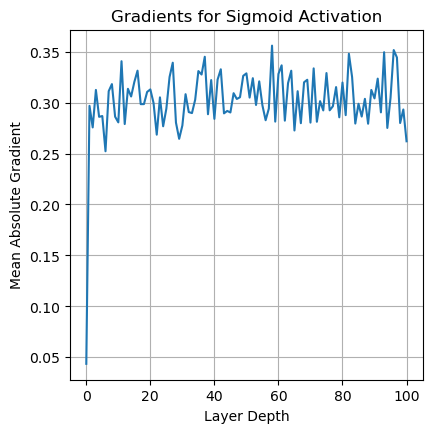

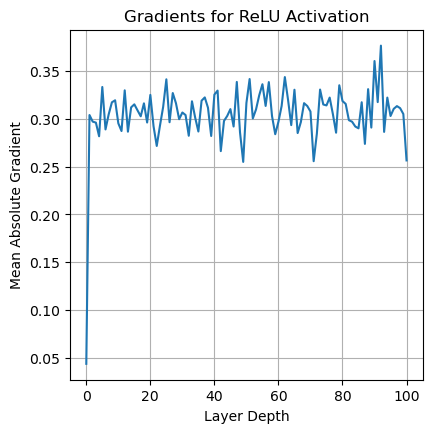

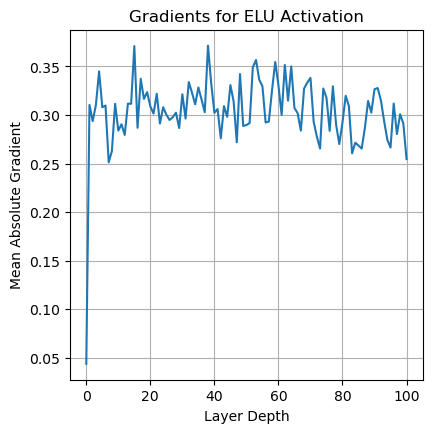

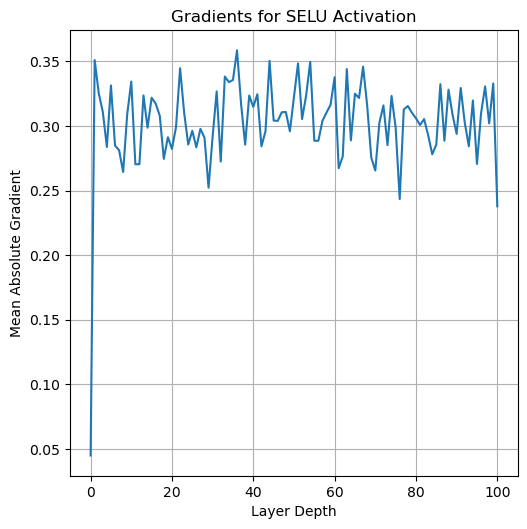

In [7]:

for i, activation in enumerate(activation_functions):
    plt.figure(figsize = (10, 10))
    plt.subplot(2, 2, i+1)
    plt.title(f'Gradients for {activations_labels[i]} Activation')

    # Build and train the model
    model = build_model(activation)
    history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2, verbose=0)

    print(f"Final Training Accuracy: {history.history['accuracy'][-1]}")
    print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")
    print(f"Final Training Loss: {history.history['loss'][-1]}")
    print(f"Final Validation Loss: {history.history['val_loss'][-1]}")
    
    
    # Compute gradients
    gradients = compute_gradients(model)

    # Plot gradients
    plt.plot(gradients)
    plt.xlabel('Layer Depth')
    plt.ylabel('Mean Absolute Gradient')
    plt.grid(True)

plt.tight_layout()
plt.show()